In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import os
import glob
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, plot_roc_curve
# pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
# !pip install graphviz
# !pip install pydotplus
# conda install graphviz
from six import StringIO
from sklearn import metrics

# # Data Preparation:

### 1. Data Creation

#### # Creating empty main csv file with all features name

In [2]:
df_main1 = pd.DataFrame(columns = ['name' ,'activity' ,'weight', 'duration','start_time' ,'change_in_load', 'variance',  'maximum', 'median', 'skewness', 'kurtosis', '0.9_quantile', 'acceleration', 'jerk', 'velocity', 'energy', 'power', 'momentum'])
df_main1

,name,activity,weight,duration,start_time,change_in_load,variance,maximum,median,skewness,kurtosis,0.9_quantile,acceleration,jerk,velocity,energy,power,momentum


#### # Creating a function of value incertion in main csv file

In [3]:
def value_insertion(loc_csv):
    df=pd.read_csv(loc_csv)
#     print(loc_csv)    # Print this if you want to track which folder is running while running the code
    df_main1.loc[len(df_main1.index)] = [df['name'][0], df['activity'][0], df['weight'][0], df['timestamp'][len(df)-1], df['start_time'][0], df['diff_load_sum'].mean(), df['diff_load_sum'].var(), df['diff_load_sum'].max(), df['diff_load_sum'].median(), df['diff_load_sum'].skew(), df['diff_load_sum'].kurtosis(), df['diff_load_sum'].quantile(0.9), df['acc'].mean(), df['jerk'].mean(), df['velo'].mean(), df['enr'].mean(), df['power'].mean(), df['mom'].mean()]
    return df_main1

#### # Creating a list with all folder's name

In [4]:
rootdir = "D:/Ajit/pip/sample_labeled9"
folder_list = []
for subdir, dirs, files in os.walk(rootdir):
    folder_list.append(subdir)
del folder_list[0]

#### # Value insertion in main csv file

In [5]:
i=0
for folder in folder_list:
    path=folder
    for filename in os.listdir(path):
        x=path+'/'+filename
#         print(i)     # Print this if you want to track which folder is running while running the code
        value_insertion(x)
        i+=1

In [97]:
# Taking backup of loaded dataset as 'df_main1'
df_main=df_main1.copy()

### 2. Data cleaning and Outlier removal

In [98]:
# Replacing NaN Name as 'unknown' (246 Rows)
df_main['name'].fillna('unknown',inplace=True)

# Dropping NaN Rows (13 Rows)
df_main.dropna(inplace=True)

# Dropping rows with weight less than 1kg (27 Rows) and more than 8kg (8 Rows).
df_main=df_main[(df_main['weight']>1000) & (df_main['weight']<8000)]

# Activity "duration" (15 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['duration']>450))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['duration']>360))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['duration']>400))]

# "Change in load" (20 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['change_in_load']>1.8))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['change_in_load']>1.8))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['change_in_load']>1.5))]

# 'Variance' (17 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['variance']>8))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['variance']>15))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['variance']>7))]

# 'Skewness' (4 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['skewness']>10))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['skewness']>11))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['skewness']>12))]

# 'Acceleration' (20 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['acceleration']>0.41))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['acceleration']>0.34))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['acceleration']>0.34))]

# 'Jerk' (22 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['jerk']>7))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['jerk']>6))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['jerk']>5.8))]

# 'Velocity' (23 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['velocity']>45))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['velocity']>32))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['velocity']>34))]

# 'Energy' (34 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['energy']>5000))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['energy']>2100))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['energy']>3000))]

# 'Power' (34 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['power']>47))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['power']>20))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['power']>27))]

# 'Momentum' (21 Rows)
df_main=df_main[~((df_main['activity']=='defecation') & (df_main['momentum']>195))]
df_main=df_main[~((df_main['activity']=='non_elimination') & (df_main['momentum']>125))]
df_main=df_main[~((df_main['activity']=='urination') & (df_main['momentum']>135))]

df_main=df_main[~((df_main['activity']=='defecation') & (df_main['energy']>4500))]

df_main.shape

(12817, 18)

### 3. Final Data

In [99]:
# Converting 'urination' and 'defecation' to 'elimination'
elemination_condition = ['urination', 'defecation']
df_main['activity1']=df_main['activity'].apply(lambda x: x if x not in elemination_condition else 'elemination')

# Onehot encoding
df_main=pd.get_dummies(df_main, columns=['activity1'])

# Droping non numeric columns
df_main.drop(['name','activity', 'start_time', 'activity1_non_elimination'],axis=1,inplace=True)

# Dropping 'Weight' column as there are no variation shown across activities in boxplot of final EDA
df_main.drop(['weight'], axis=1, inplace=True)

### Deleting 0.9_quantile and acceleration column as a result of Backward elimination in modelling
df_main.drop(['0.9_quantile', 'acceleration'], axis=1, inplace=True)
df_main.head()

,duration,change_in_load,variance,maximum,median,skewness,kurtosis,jerk,velocity,energy,power,momentum,activity1_elemination
0,163.975000,1.114670,2.425972,14.11659,0.43164,2.088879,5.125106,2.623752,18.629980,1422.404601,14.699895,129.161654,1
1,204.774940,0.996088,2.262248,19.98297,0.32373,2.502551,9.150935,2.854197,20.030623,1626.238512,15.753942,129.217548,1
2,59.975000,0.292591,0.218968,4.16925,0.05886,2.892435,11.742110,0.638543,1.792097,13.463229,0.355113,12.974780,1
3,156.775000,0.952895,2.215583,12.43908,0.23544,2.385345,6.859419,2.379447,14.293334,898.360000,9.996573,101.825709,1
4,183.974939,1.174555,3.997131,15.75486,0.14715,2.486553,7.492540,2.929181,21.458935,2029.562636,17.758225,153.431382,1


In [100]:
df_main.columns

Index(['duration', 'change_in_load', 'variance', 'maximum', 'median',
       'skewness', 'kurtosis', 'jerk', 'velocity', 'energy', 'power',
       'momentum', 'activity1_elemination'],
      dtype='object')

### 4. Upsampling

In [101]:
df_majority = df_main[df_main.activity1_elemination==1]
df_minority = df_main[df_main.activity1_elemination==0]

df_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=0)

df_main = pd.concat([df_majority, df_upsampled])

# # Modelling

### Data splitting to train, test and validation

In [102]:
df_shuffeled=df_main.sample(frac=1,random_state=101)

df_train=df_shuffeled[:int(len(df_shuffeled)*0.6)]
df_validate=df_shuffeled[int(len(df_shuffeled)*.6):int(len(df_shuffeled)*0.8)]
df_test=df_shuffeled[int(len(df_shuffeled)*0.8):]


x_train = df_train.drop(columns='activity1_elemination')
y_train = df_train['activity1_elemination']

x_validate = df_validate.drop(columns='activity1_elemination')
y_validate = df_validate['activity1_elemination']

x_test = df_test.drop(columns='activity1_elemination')
y_test = df_test['activity1_elemination']

### Modelling Using Random Forest (Best Model)

In [103]:
def error_metrics(actual, predicted, x_data):
    print('Accuracy %age: ' + str(np.round(accuracy_score(actual, predicted)*100,2)))
    print('ROC-AUC Score: ' + str(np.round(roc_auc_score(actual, classifier.predict_proba(x_data)[:,1]),2)))
    print('\nClassification Report: ')
    print(classification_report(actual, predicted))
    print('\nConfusion Matrix: ')
    print(confusion_matrix(actual, predicted))
    return 'Done'

#### Training Set

In [104]:
classifier = RandomForestClassifier(n_estimators=55, criterion='entropy',max_depth =35, random_state=10)
classifier.fit(x_train, y_train)

print('\nTraining\n--------------------------')
y_train_pred=classifier.predict(x_train)
error_metrics(y_train, y_train_pred, x_train)


Training
--------------------------
Accuracy %age: 99.97
ROC-AUC Score: 1.0

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5267
           1       1.00      1.00      1.00      5275

    accuracy                           1.00     10542
   macro avg       1.00      1.00      1.00     10542
weighted avg       1.00      1.00      1.00     10542


Confusion Matrix: 
[[5265    2]
 [   1 5274]]


'Done'

#### Validation Set

In [105]:
print('\nValidation\n--------------------------')
y_validate_pred=classifier.predict(x_validate)
error_metrics(y_validate, y_validate_pred, x_validate)


Validation
--------------------------
Accuracy %age: 91.8
ROC-AUC Score: 0.97

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1745
           1       0.92      0.92      0.92      1769

    accuracy                           0.92      3514
   macro avg       0.92      0.92      0.92      3514
weighted avg       0.92      0.92      0.92      3514


Confusion Matrix: 
[[1604  141]
 [ 147 1622]]


'Done'

#### Test Set

In [106]:
print('\nTesting\n--------------------------')
y_test_pred=classifier.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)


Testing
--------------------------
Accuracy %age: 90.81
ROC-AUC Score: 0.96

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1773
           1       0.91      0.90      0.91      1741

    accuracy                           0.91      3514
   macro avg       0.91      0.91      0.91      3514
weighted avg       0.91      0.91      0.91      3514


Confusion Matrix: 
[[1618  155]
 [ 168 1573]]


'Done'

### Feature Importance

In [107]:
feature_importance_df = pd.DataFrame()
feature_importance_df['Features'] = x_test.columns
feature_importance_df['Importance'] = classifier.feature_importances_
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
feature_importance_df

,Features,Importance
0,velocity,0.138373
1,duration,0.132932
2,energy,0.114559
3,momentum,0.106842
4,change_in_load,0.075884
5,power,0.070602
6,jerk,0.068148
7,variance,0.063502
8,median,0.060501
9,kurtosis,0.057483


<AxesSubplot: xlabel='Importance', ylabel='Features'>

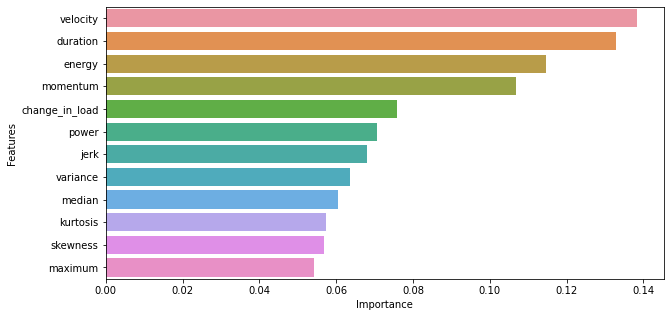

In [108]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Importance', y = 'Features', data = feature_importance_df)

# # Residual Analysis

### Using Random Forest Test set

In [109]:
df_main.head()

,duration,change_in_load,variance,maximum,median,skewness,kurtosis,jerk,velocity,energy,power,momentum,activity1_elemination
0,163.975000,1.114670,2.425972,14.11659,0.43164,2.088879,5.125106,2.623752,18.629980,1422.404601,14.699895,129.161654,1
1,204.774940,0.996088,2.262248,19.98297,0.32373,2.502551,9.150935,2.854197,20.030623,1626.238512,15.753942,129.217548,1
2,59.975000,0.292591,0.218968,4.16925,0.05886,2.892435,11.742110,0.638543,1.792097,13.463229,0.355113,12.974780,1
3,156.775000,0.952895,2.215583,12.43908,0.23544,2.385345,6.859419,2.379447,14.293334,898.360000,9.996573,101.825709,1
4,183.974939,1.174555,3.997131,15.75486,0.14715,2.486553,7.492540,2.929181,21.458935,2029.562636,17.758225,153.431382,1


In [110]:
classifier = RandomForestClassifier(n_estimators=55, criterion='entropy',max_depth =35, random_state=10)
classifier.fit(x_train, y_train)

print('\nTesting\n--------------------------')
y_test_pred=classifier.predict(x_test)
error_metrics(y_test, y_test_pred, x_test)


Testing
--------------------------
Accuracy %age: 90.81
ROC-AUC Score: 0.96

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1773
           1       0.91      0.90      0.91      1741

    accuracy                           0.91      3514
   macro avg       0.91      0.91      0.91      3514
weighted avg       0.91      0.91      0.91      3514


Confusion Matrix: 
[[1618  155]
 [ 168 1573]]


'Done'

### 1. Falsely identified as Non-elimination (False 0)

#### Number of Rows misidentified as Non-elimination

In [111]:
False_0 = x_test[(y_test == 1) & (y_test_pred[:].T == 0)]
False_0.shape

(168, 12)

#### Features average value for 'Elimination'

In [112]:
df_main_elimination=df_main[df_main['activity1_elemination']==1]
elimination_mean=df_main_elimination[['duration', 'change_in_load', 'variance', 'maximum', 'median',
       'skewness', 'kurtosis', 'jerk', 'velocity', 'energy', 'power',
       'momentum']].mean()
elimination_mean

duration          126.132674
change_in_load      0.593965
variance            0.870689
maximum            12.121900
median              0.262172
skewness            4.728600
kurtosis           39.373868
jerk                2.027612
velocity            9.605335
energy            388.560718
power               5.783112
momentum           46.382069
dtype: float64

#### Features average value for 'Non-limination'

In [113]:
df_main_nonelimination=df_main[df_main['activity1_elemination']==0]
nonelimination_mean=df_main_nonelimination[['duration', 'change_in_load', 'variance', 'maximum', 'median',
       'skewness', 'kurtosis', 'jerk', 'velocity', 'energy', 'power',
       'momentum']].mean()
nonelimination_mean

duration           78.902046
change_in_load      0.450300
variance            0.960174
maximum            10.840219
median              0.160269
skewness            5.472606
kurtosis           46.545640
jerk                1.695237
velocity            4.589300
energy            106.579710
power               1.967955
momentum           21.572966
dtype: float64

#### Features average values for elimination misidentified as non-elimination

In [114]:
False_0_mean=False_0[['duration', 'change_in_load', 'variance', 'maximum', 'median',
       'skewness', 'kurtosis', 'jerk', 'velocity', 'energy', 'power',
       'momentum']].mean()
False_0_mean

duration          83.888392
change_in_load     0.404234
variance           0.803806
maximum           10.545529
median             0.128523
skewness           5.534470
kurtosis          47.760614
jerk               1.597785
velocity           4.537571
energy            83.921048
power              1.803493
momentum          20.999388
dtype: float64

#### Table of Feature's mean

In [115]:
data = {"Elimination": elimination_mean,
        "Non-elimination": nonelimination_mean,
        "Misidentified_as_nonelimination": False_0_mean}
df_mean = pd.concat(data,axis = 1)
df_mean

,Elimination,Non-elimination,Misidentified_as_nonelimination
duration,126.132674,78.902046,83.888392
change_in_load,0.593965,0.450300,0.404234
variance,0.870689,0.960174,0.803806
maximum,12.121900,10.840219,10.545529
median,0.262172,0.160269,0.128523
skewness,4.728600,5.472606,5.534470
kurtosis,39.373868,46.545640,47.760614
jerk,2.027612,1.695237,1.597785
velocity,9.605335,4.589300,4.537571
energy,388.560718,106.579710,83.921048


#### ( Those elimination has features value nearer to non-elimination values are misidentified as non-elimination )

#### Box plots of elimination misidentified as non-elimination

In [116]:
False_0 = False_0[['duration', 'skewness', 'change_in_load', 'jerk', 'velocity', 'energy', 'power','momentum']]
False_0.columns

Index(['duration', 'skewness', 'change_in_load', 'jerk', 'velocity', 'energy',
       'power', 'momentum'],
      dtype='object')

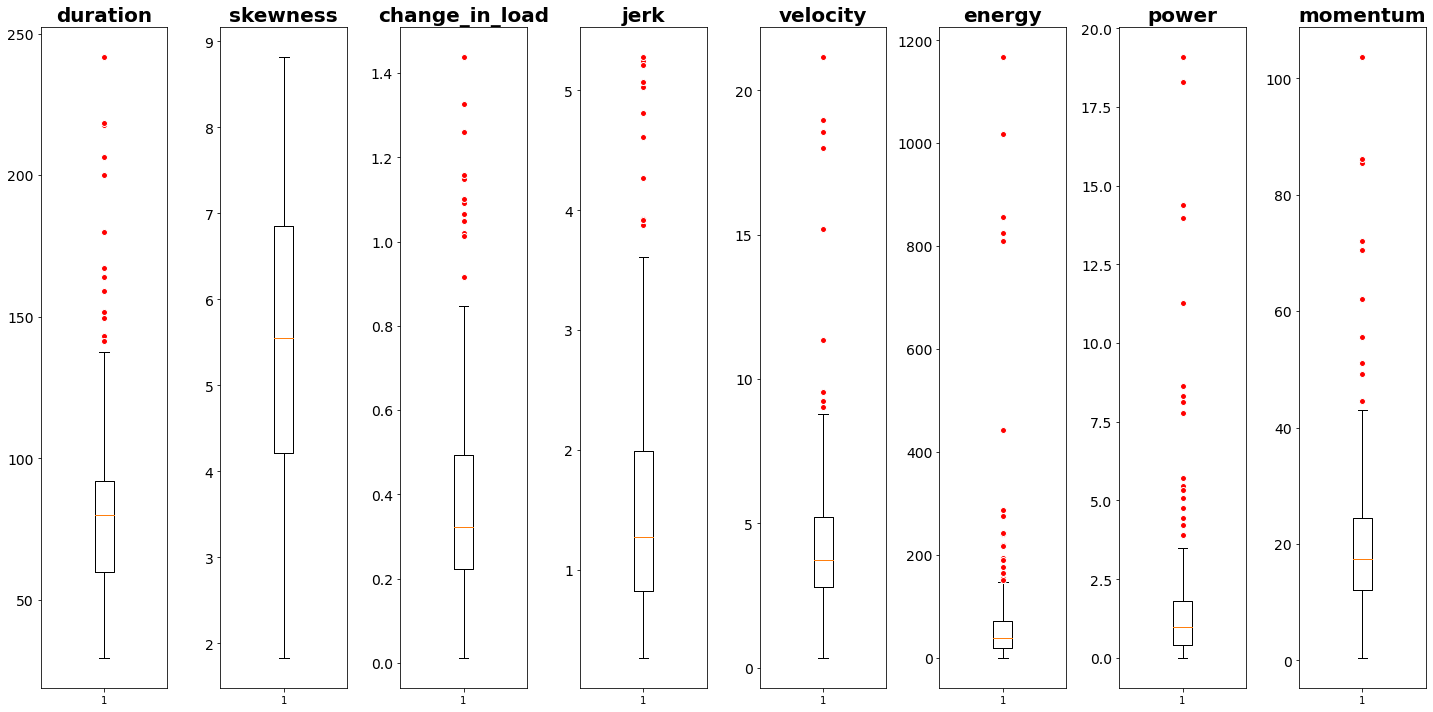

In [117]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(False_0.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(False_0.iloc[:,i], flierprops=red_circle)
    ax.set_title(False_0.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

#### Count of urination and defication among misidentified as non-elimination

In [118]:
# List of index number of misidentfied as non-elimination:
index_list=list(False_0.index)

# Activities of misidentfied rows:
df_main2=df_main1.copy()
urination_count=0
defecation_count=0
for index in index_list:
    if df_main2.loc[index]['activity']=='urination':
        urination_count +=1
    else:
        defecation_count +=1
print( 'Urination Rows : '+str(urination_count))
print( 'Defecation Rows : '+str(defecation_count))

Urination Rows : 158
Defecation Rows : 10


#### ( Among the rows misidentified as non-elimination, 141 rows are urination & 10 rows are defecation )

### 2. Falsely identified as Elimination (False 1)

#### Number of Rows misidentified as Elimination

In [119]:
False_1 = x_test[(y_test == 0) & (y_test_pred[:].T == 1)]
False_1.shape

(155, 12)

#### Features average value for 'Elimination'

In [120]:
df_main_elimination=df_main[df_main['activity1_elemination']==1]
elimination_mean = df_main_elimination[['duration', 'change_in_load', 'variance', 'maximum', 'median',
       'skewness', 'kurtosis', 'jerk', 'velocity', 'energy', 'power',
       'momentum']].mean()
elimination_mean

duration          126.132674
change_in_load      0.593965
variance            0.870689
maximum            12.121900
median              0.262172
skewness            4.728600
kurtosis           39.373868
jerk                2.027612
velocity            9.605335
energy            388.560718
power               5.783112
momentum           46.382069
dtype: float64

#### Features average value for 'Non-limination'

In [121]:
df_main_nonelimination=df_main[df_main['activity1_elemination']==0]
nonelimination_mean=df_main_nonelimination[['duration', 'change_in_load', 'variance', 'maximum', 'median',
       'skewness', 'kurtosis', 'jerk', 'velocity', 'energy', 'power',
       'momentum']].mean()
nonelimination_mean

duration           78.902046
change_in_load      0.450300
variance            0.960174
maximum            10.840219
median              0.160269
skewness            5.472606
kurtosis           46.545640
jerk                1.695237
velocity            4.589300
energy            106.579710
power               1.967955
momentum           21.572966
dtype: float64

#### Features average values for non-elimination misidentified as elimination

In [122]:
False_1_mean = False_1[['duration', 'change_in_load', 'variance', 'maximum', 'median',
       'skewness', 'kurtosis', 'jerk', 'velocity', 'energy', 'power',
       'momentum']].mean()
False_1_mean

duration          121.659248
change_in_load      0.528859
variance            0.809879
maximum            11.556879
median              0.219301
skewness            4.894638
kurtosis           41.462552
jerk                2.020110
velocity            8.596379
energy            291.848067
power               4.324942
momentum           39.695034
dtype: float64

#### Table of Feature's mean

In [123]:
data = {"Elimination": elimination_mean,
        "Non-elimination": nonelimination_mean,
        "Misidentified_as_elimination": False_1_mean}
df_mean = pd.concat(data,
               axis = 1)
df_mean

,Elimination,Non-elimination,Misidentified_as_elimination
duration,126.132674,78.902046,121.659248
change_in_load,0.593965,0.450300,0.528859
variance,0.870689,0.960174,0.809879
maximum,12.121900,10.840219,11.556879
median,0.262172,0.160269,0.219301
skewness,4.728600,5.472606,4.894638
kurtosis,39.373868,46.545640,41.462552
jerk,2.027612,1.695237,2.020110
velocity,9.605335,4.589300,8.596379
energy,388.560718,106.579710,291.848067


#### ( Those non-elimination has features value nearer to elimination values are misidentified as elimination )

In [124]:
df_False_1 = pd.DataFrame()
df_False_1['Non-elimination'] = df_main_elimination.mean()
df_False_1['Elimination'] = False_1.mean()
df_False_1

,Non-elimination,Elimination
duration,126.132674,121.659248
change_in_load,0.593965,0.528859
variance,0.870689,0.809879
maximum,12.121900,11.556879
median,0.262172,0.219301
skewness,4.728600,4.894638
kurtosis,39.373868,41.462552
jerk,2.027612,2.020110
velocity,9.605335,8.596379
energy,388.560718,291.848067


#### Box plots of non-elimination misidentified as elimination

In [125]:
False_1_box = False_1[['duration', 'skewness', 'change_in_load', 'jerk', 'velocity', 'energy', 'power','momentum']]
False_1_box.columns

Index(['duration', 'skewness', 'change_in_load', 'jerk', 'velocity', 'energy',
       'power', 'momentum'],
      dtype='object')

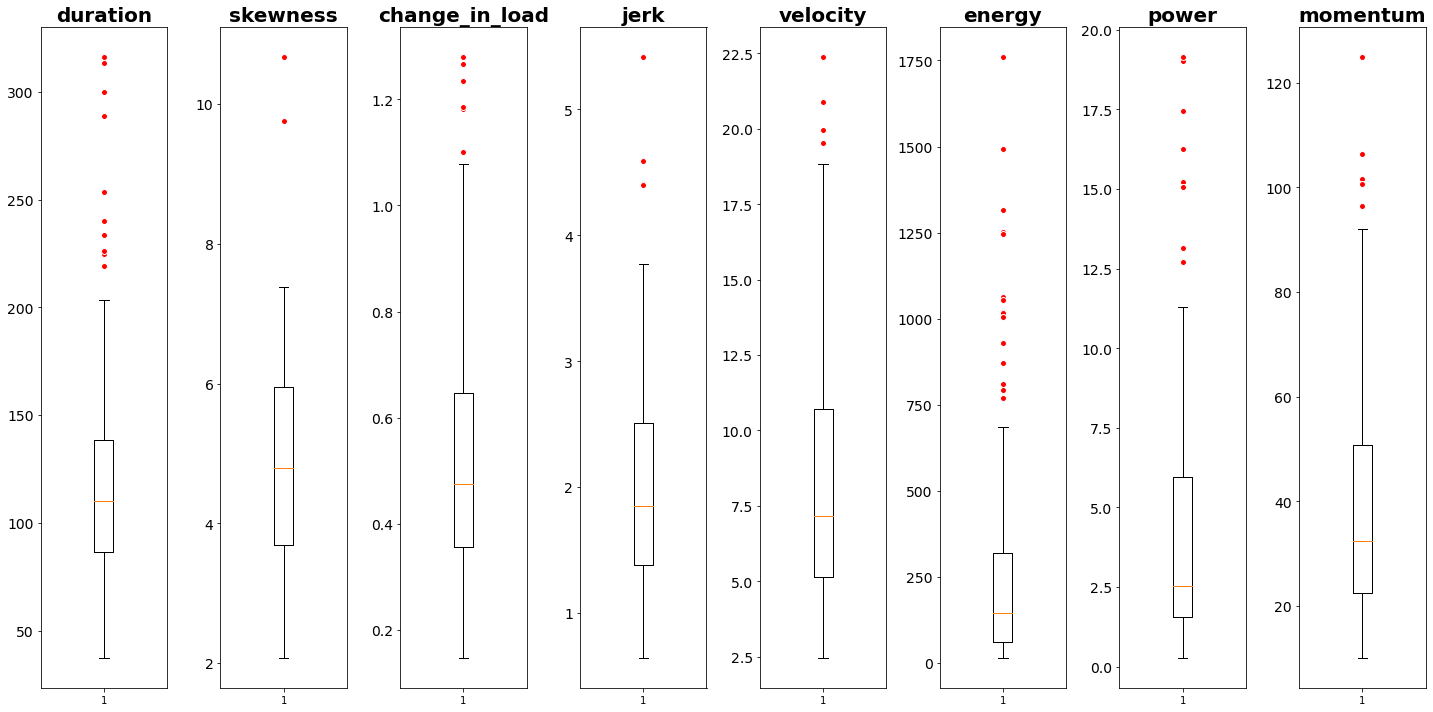

In [126]:
#Creating subplot of each column with its own scale

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(False_1_box.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(False_1_box.iloc[:,i], flierprops=red_circle)
    ax.set_title(False_1_box.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

#### ( Among the rows misidentified as elimination, all rows are of defecation )

# # Insights

### 1. Rightly identifies as elimination

In [132]:
True_1 = x_test[(y_test == 1) & (y_test_pred[:].T == 1)]
True_1.shape

(1573, 12)

In [133]:
True_1.mean()

duration          130.946486
change_in_load      0.613592
variance            0.886113
maximum            12.359243
median              0.273370
skewness            4.616363
kurtosis           38.113096
jerk                2.076319
velocity           10.143223
energy            430.082183
power               6.211223
momentum           49.296167
dtype: float64

### 2. Rightly identified as non-elimination

In [134]:
True_0 = x_test[(y_test == 0) & (y_test_pred[:].T == 0)]
True_0.shape

(1618, 12)

In [135]:
True_0.mean()

duration          75.299859
change_in_load     0.447634
variance           0.924049
maximum           10.532929
median             0.161210
skewness           5.402899
kurtosis          45.248753
jerk               1.691787
velocity           4.281409
energy            90.678733
power              1.800096
momentum          20.058240
dtype: float64

#### Mean table of rightly identified activities

In [131]:
df_insight = pd.DataFrame()
df_insight['Non-elimination'] = True_0.mean()
df_insight['Elimination'] = True_1.mean()
df_insight

,Non-elimination,Elimination
duration,75.299859,130.946486
change_in_load,0.447634,0.613592
variance,0.924049,0.886113
maximum,10.532929,12.359243
median,0.161210,0.273370
skewness,5.402899,4.616363
kurtosis,45.248753,38.113096
jerk,1.691787,2.076319
velocity,4.281409,10.143223
energy,90.678733,430.082183
